# Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa em um Jupyter Notebook.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

In [2]:
!pip install wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.6 MB/s eta 0:00:00


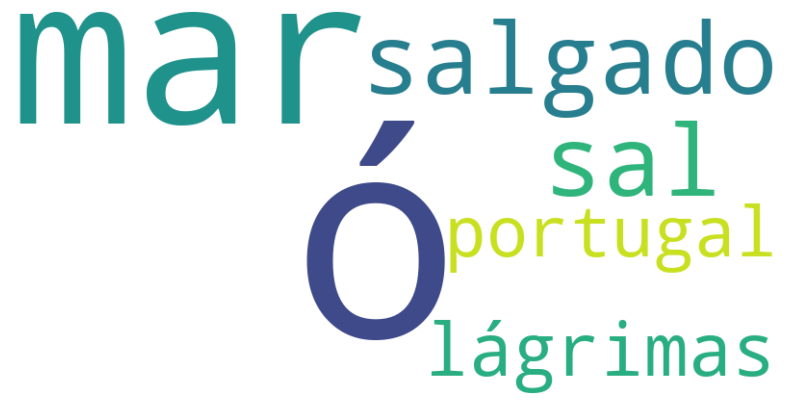

In [3]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carregar o modelo de português do spaCy
nlp = spacy.load("pt_core_news_sm")

# Texto de exemplo (substituir pelo corpus real)
corpus = """Ó mar salgado, quanto do teu sal
            São lágrimas de Portugal!"""

# Processar o texto
doc = nlp(corpus)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.
* Código de exemplo:

In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


/tmp/ipykernel_139024/1546815310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=df_frequencia, palette="Blues_r")


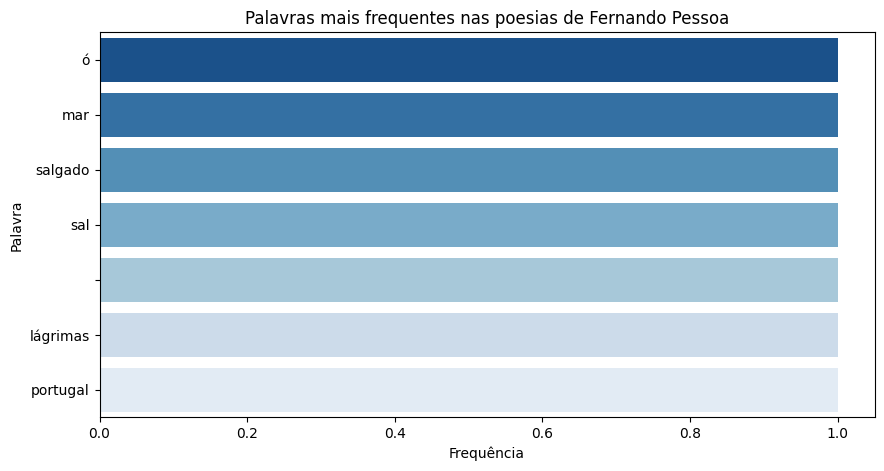

In [6]:
from collections import Counter
import seaborn as sns

# Contagem de palavras
frequencia = Counter(tokens_filtrados)

# Criar DataFrame para visualização
import pandas as pd
df_frequencia = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plotar gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x="Frequência", y="Palavra", data=df_frequencia, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa")
plt.show()


# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.
* Código de exemplo:

/tmp/ipykernel_139024/1796542657.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")


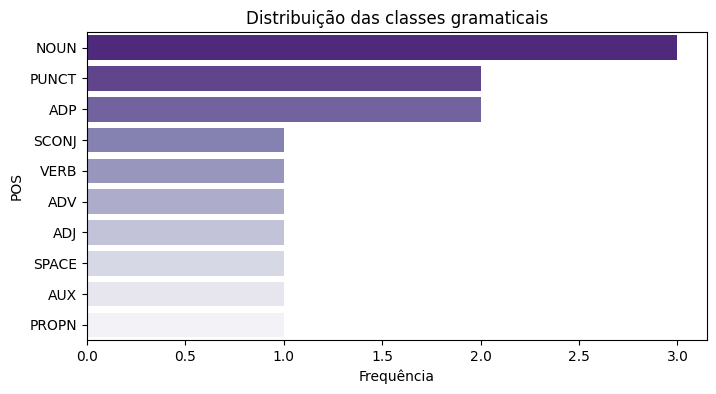

In [7]:
# Contagem de classes gramaticais
pos_tags = [token.pos_ for token in doc]
contagem_pos = Counter(pos_tags)

# Criar DataFrame para visualização
df_pos = pd.DataFrame(contagem_pos.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("POS")
plt.title("Distribuição das classes gramaticais")
plt.show()


# Modelagem de Estilo e Semântica
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.
* Código de exemplo:

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criar um vetor TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([corpus])

# Mostrar palavras mais importantes
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))


         de        do  lágrimas       mar  portugal    quanto       sal  \
0  0.316228  0.316228  0.316228  0.316228  0.316228  0.316228  0.316228   

    salgado       são       teu  
0  0.316228  0.316228  0.316228  


# Comparação com Outros Poetas
* Atividade:
    * Comparar a escrita de Fernando Pessoa com a de outros poetas portugueses.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.
* Código de exemplo:

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Exemplo comparando estilos de diferentes poetas
corpus_outro_poeta = "Minha terra tem palmeiras onde canta o sabiá."
X2 = vectorizer.transform([corpus_outro_poeta])

# Comparar semelhança entre Pessoa e outro poeta
sim = cosine_similarity(X, X2)
print(f"Similaridade entre Fernando Pessoa e outro poeta: {sim[0][0]:.2f}")


Similaridade entre Fernando Pessoa e outro poeta: 0.00


# Apresentação dos Resultados
* Atividade:
    * Criar um relatório ou apresentação com os achados da análise.
    * Destacar padrões estilísticos, estrutura das poesias e insights interessantes.
    * Se possível, treinar um modelo para prever a autoria de um poema.
